In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [44]:
df = pd.read_csv('Amreli NRM data for model building2.csv')

df = df[df['Heat number (life number)']>1]    
df = df.reset_index(drop=True)
df['Number of capacitors removed'].fillna(0, inplace=True)

In [45]:
df.columns

Index(['campaign', 'Heat number (life number)',
       'Total Heat Time previous (minutes)', 'Total Heat Time (minutes)',
       'Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)',
       'Input (MT)', 'Final C%', 'Tapping Temperature (C)', 'Output (MT)',
       'Input energy previous (KWH)', 'Input energy (KWH)', 'Previous Voltage',
       'Previous Frequency', 'Previous Rating of the Furnace', 'Voltage',
       'Frequency', 'Rating of the furnace (KW)', 'Melt rate (MT/Hr)',
       'Efficiency (MT/KWH)', 'Number of capacitors removed',
       'Refractory lining before heating', 'Refractory lining after heating',
       'Previous Input', 'Previous Output'],
      dtype='object')

HK: 'Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Number of capacitors removed','Tapping Temperature (C)'
HK-1: 'Refractory lining before heating','Previous Voltage', 'Previous Frequency','Previous Input','Previous Output','Previous Input Energy','Previous Heat Time'

In [46]:
input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Number of capacitors removed','Tapping Temperature (C)','Refractory lining before heating',
                 'Previous Voltage', 'Previous Frequency','Previous Input', 'Previous Output','Input energy previous (KWH)']
output_columns = ['Efficiency (MT/KWH)']

In [47]:
X = df[input_columns]
X_train = X.iloc[:318,:].values
X_test = X.iloc[318:,:].values
y = df[output_columns]
y_train = y.iloc[:318,:].values
y_test = y.iloc[318:,:].values

In [48]:
scaler1 = MinMaxScaler()
normalized_X_train = scaler1.fit_transform(X_train)
normalized_X_test = scaler1.transform(X_test)

scaler2 = MinMaxScaler()
normalized_y_train = scaler2.fit_transform(y_train)
normalized_y_test = scaler2.transform(y_test)

In [49]:
## Keras NN
## model = Sequential()
n_input = X_train.shape[1] # number of features
n_hidden_1 = 500
n_hidden_2 = 100
n_hidden_3 = 50
n_hidden_4 = 150
n_hidden_5 = 100
n_hidden_6 = 50
n_hidden_7 = 25
num_digits = 1
n_output = 1

Inp = Input(shape=(n_input,))
x = Dense(n_hidden_1, activation='relu')(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
# x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
# x = Dense(n_hidden_5, activation='relu', name = "Hidden_Layer_5")(x)
# x = Dense(n_hidden_6, activation='relu', name = "Hidden_Layer_6")(x)
# x = Dense(n_hidden_7, activation='relu', name = "Hidden_Layer_7")(x)

output = Dense(num_digits, activation='linear', name = "Output_Layer")(x)
    
model = Model(Inp, output)
model.summary() 
learning_rate = 0.001
training_epochs = 500
batch_size = 5
sgd = optimizers.SGD(lr=learning_rate)
model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer='adam',
                  metrics=['mse'])
    
history = model.fit(normalized_X_train, normalized_y_train,
                         batch_size = batch_size,
                         epochs = training_epochs,
                         verbose = 2)


pred_train = model.predict(normalized_X_train)
y_pred_train = scaler2.inverse_transform(pred_train)
pred_test = model.predict(normalized_X_test)
y_pred_test = scaler2.inverse_transform(pred_test)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 12)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               6500      
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               50100     
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 50)                5050      
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 51        
Total params: 61,701
Trainable params: 61,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
 - 1s - loss: 0.0111 - mse: 0.0111
Epoch 2/500
 - 0s - loss: 0.0041 - mse: 0.0041
Epoch 3/500
 - 0s - loss: 0

Epoch 150/500
 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 151/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 152/500
 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 153/500
 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 154/500
 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 155/500
 - 0s - loss: 0.0022 - mse: 0.0022
Epoch 156/500
 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 157/500
 - 1s - loss: 0.0020 - mse: 0.0020
Epoch 158/500
 - 1s - loss: 0.0020 - mse: 0.0020
Epoch 159/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 160/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 161/500
 - 0s - loss: 0.0024 - mse: 0.0024
Epoch 162/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 163/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 164/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 165/500
 - 0s - loss: 0.0025 - mse: 0.0025
Epoch 166/500
 - 0s - loss: 0.0029 - mse: 0.0029
Epoch 167/500
 - 0s - loss: 0.0023 - mse: 0.0023
Epoch 168/500
 - 0s - loss: 0.0025 - mse: 0.0025
Epoch 169/500
 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 170/500
 - 0s 

 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 318/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 319/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 320/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 321/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 322/500
 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 323/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 324/500
 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 325/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 326/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 327/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 328/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 329/500
 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 330/500
 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 331/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 332/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 333/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 334/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 335/500
 - 0s - loss: 0.0015 - mse: 0.0015
Epoch 336/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 337/500
 - 0s - loss: 0.0017

Epoch 484/500
 - 0s - loss: 0.0014 - mse: 0.0014
Epoch 485/500
 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 486/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 487/500
 - 0s - loss: 0.0012 - mse: 0.0012
Epoch 488/500
 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 489/500
 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 490/500
 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 491/500
 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 492/500
 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 493/500
 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 494/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 495/500
 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 496/500
 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 497/500
 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 498/500
 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 499/500
 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 500/500
 - 0s - loss: 0.0016 - mse: 0.0016


In [50]:
for i in range(num_digits):
    print(output_columns[i])
    print("Train score is {}".format(mean_squared_error(y_train[:,i], y_pred_train[:,i])))
    print("Test score is {}".format(mean_squared_error(y_test[:,i], y_pred_test[:,i])))
    print("R2 score is {}".format(r2_score(y_test[:,i], y_pred_test[:,i])))
    print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train[:,i]-y_train[:,i]))/np.sum(np.square(y_train[:,i]-np.mean(y_train[:,i])))*100))
    print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test[:,i]-y_test[:,i]))/np.sum(np.square(y_test[:,i]-np.mean(y_test[:,i])))*100))

Efficiency (MT/KWH)
Train score is 1.1423377974977767e-08
Test score is 7.483249986569825e-09
R2 score is -0.8241795433019585
Train NMSE score is 40.18186628461969
Test NMSE score is 182.41795433019584


In [51]:
y_pred_train = y_pred_train.reshape(318,)
y_pred_test = y_pred_test.reshape(122,)
y = np.concatenate((y_pred_train, y_pred_test),axis=0)
df['Predicted Efficiency'] = y

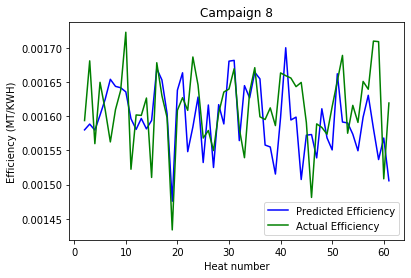

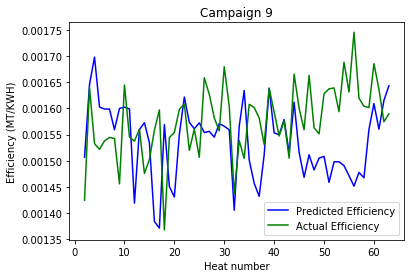

In [52]:
camp = [8,9]

for c in camp:
    dfc = df[df['campaign']==c]
    dfc = dfc.reset_index(drop=True)
    plt.plot(dfc['Heat number (life number)'],dfc['Predicted Efficiency'],c='b');
    plt.plot(dfc['Heat number (life number)'],dfc['Efficiency (MT/KWH)'],c='g');
    plt.xlabel('Heat number');
    plt.ylabel('Efficiency (MT/KWH)');
    plt.title('Campaign {}'.format(c));
    plt.legend(['Predicted Efficiency','Actual Efficiency']);
    plt.show();

In [53]:
df.columns

Index(['campaign', 'Heat number (life number)',
       'Total Heat Time previous (minutes)', 'Total Heat Time (minutes)',
       'Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)',
       'Input (MT)', 'Final C%', 'Tapping Temperature (C)', 'Output (MT)',
       'Input energy previous (KWH)', 'Input energy (KWH)', 'Previous Voltage',
       'Previous Frequency', 'Previous Rating of the Furnace', 'Voltage',
       'Frequency', 'Rating of the furnace (KW)', 'Melt rate (MT/Hr)',
       'Efficiency (MT/KWH)', 'Number of capacitors removed',
       'Refractory lining before heating', 'Refractory lining after heating',
       'Previous Input', 'Previous Output', 'Predicted Efficiency'],
      dtype='object')

<Figure size 1440x720 with 0 Axes>

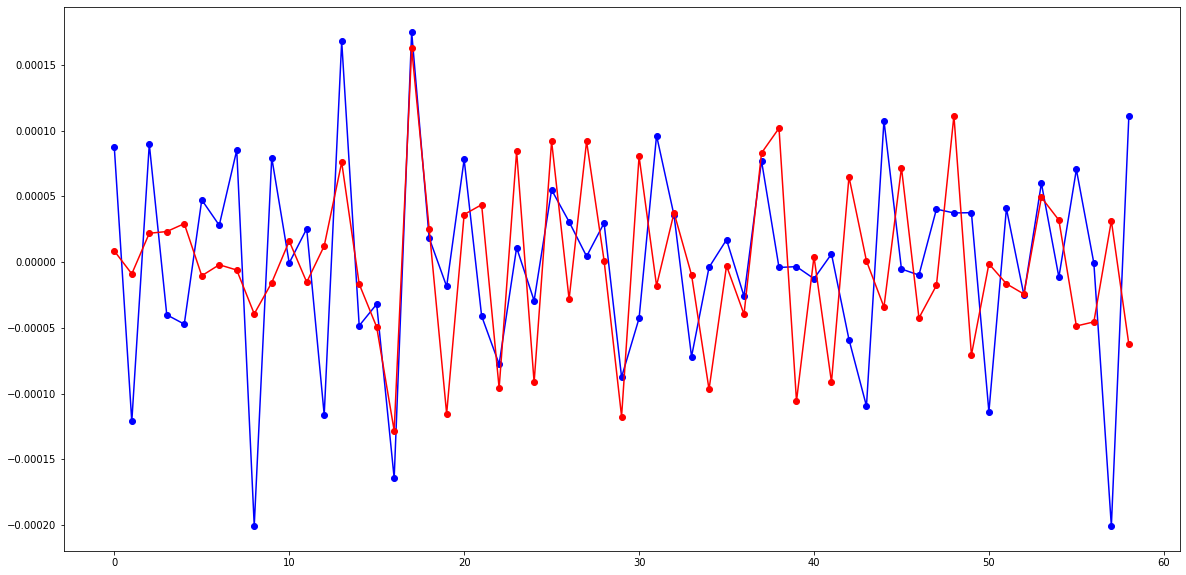

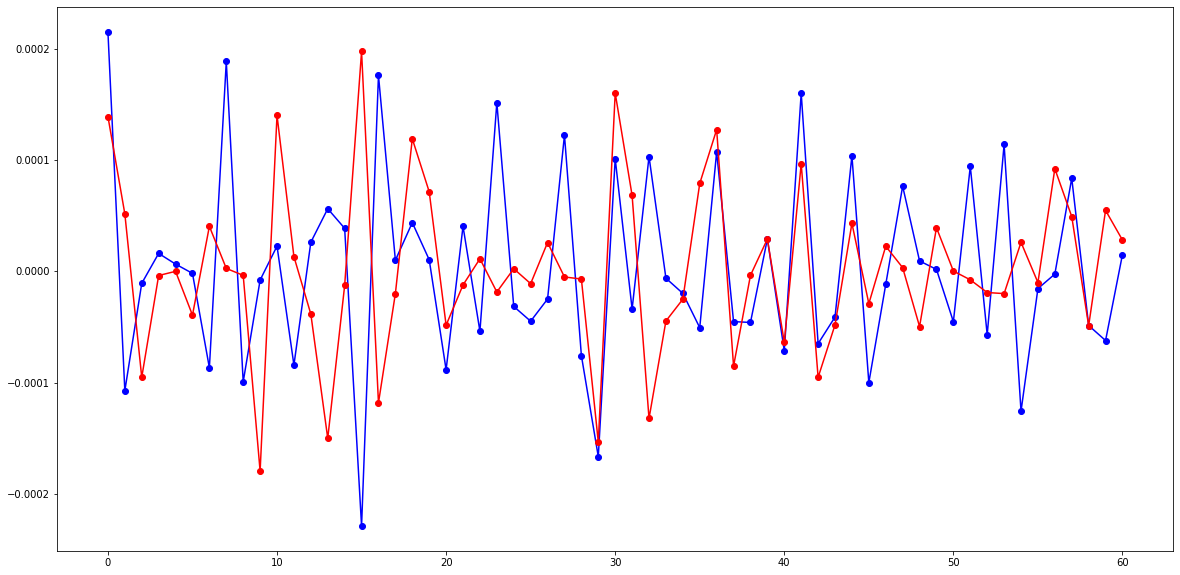

In [54]:
camp = [8,9]
a = []
b = []

for c in camp:
    dfc = df[df['campaign']==c]
    dfc = dfc.reset_index(drop=True)
    for i in range(dfc.shape[0]-1):
        a.append(dfc['Efficiency (MT/KWH)'][i+1]-dfc['Efficiency (MT/KWH)'][i])
        b.append(dfc['Predicted Efficiency'][i+1]-dfc['Predicted Efficiency'][i])
    plt.figure(figsize=(20,10))
    plt.plot(a, c='b',marker='o',label='Actual')
    plt.plot(b,c='r',marker='o',label='Predicted')
    plt.show()
    a = []
    b = []

# Efficiency Kg/KWH

In [8]:
df = pd.read_csv('Amreli NRM data for model building2.csv')

df = df[df['Heat number (life number)']>1]    
df = df.reset_index(drop=True)
df['Number of capacitors removed'].fillna(0, inplace=True)

In [9]:
df['Efficiency (MT/KWH)'] = df['Efficiency (MT/KWH)']*1000
df['Previous Output'] = df['Previous Output']*1000
df['Previous Input'] = df['Previous Input']*1000
df['Scrap (MT)'] = df['Scrap (MT)']*1000
df['Sponge (MT)'] = df['Sponge (MT)']*1000
df['Alloys (MT)'] = df['Alloys (MT)']*1000

In [10]:
input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Number of capacitors removed','Tapping Temperature (C)','Refractory lining before heating',
                 'Previous Voltage', 'Previous Frequency','Previous Input', 'Previous Output','Input energy previous (KWH)']
output_columns = ['Efficiency (MT/KWH)']

In [11]:
X = df[input_columns]
X_train = X.iloc[:318,:].values
X_test = X.iloc[318:,:].values
y = df[output_columns]
y_train = y.iloc[:318,:].values
y_test = y.iloc[318:,:].values

In [12]:
scaler1 = MinMaxScaler()
normalized_X_train = scaler1.fit_transform(X_train)
normalized_X_test = scaler1.transform(X_test)

scaler2 = MinMaxScaler()
normalized_y_train = scaler2.fit_transform(y_train)
normalized_y_test = scaler2.transform(y_test)

In [13]:
## Keras NN
## model = Sequential()
n_input = X_train.shape[1] # number of features
n_hidden_1 = 500
n_hidden_2 = 100
n_hidden_3 = 50
n_hidden_4 = 150
n_hidden_5 = 100
n_hidden_6 = 50
n_hidden_7 = 25
num_digits = 1
n_output = 1

Inp = Input(shape=(n_input,))
x = Dense(n_hidden_1, activation='relu')(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
# x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
# x = Dense(n_hidden_5, activation='relu', name = "Hidden_Layer_5")(x)
# x = Dense(n_hidden_6, activation='relu', name = "Hidden_Layer_6")(x)
# x = Dense(n_hidden_7, activation='relu', name = "Hidden_Layer_7")(x)

output = Dense(num_digits, activation='linear', name = "Output_Layer")(x)
    
model = Model(Inp, output)
model.summary() 
learning_rate = 0.001
training_epochs = 500
batch_size = 5
sgd = optimizers.SGD(lr=learning_rate)
model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer='adam',
                  metrics=['mse'])
    
history = model.fit(normalized_X_train, normalized_y_train,
                         batch_size = batch_size,
                         epochs = training_epochs,
                         verbose = 2)


pred_train = model.predict(normalized_X_train)
y_pred_train = scaler2.inverse_transform(pred_train)
pred_test = model.predict(normalized_X_test)
y_pred_test = scaler2.inverse_transform(pred_test)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               6500      
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               50100     
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 50)                5050      
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 51        
Total params: 61,701
Trainable params: 61,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
 - 1s - loss: 0.0070 - mse: 0.0070
Epoch 2/500
 - 0s - loss: 0.0048 - mse: 0.0048
Epoch 3/500
 - 0s - loss: 0

Epoch 150/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 151/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 152/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 153/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 154/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 155/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 156/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 157/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 158/500
 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 159/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 160/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 161/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 162/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 163/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 164/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 165/500
 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 166/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 167/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 168/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 169/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 170/500
 - 0s 

 - 0s - loss: 0.0015 - mse: 0.0015
Epoch 318/500
 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 319/500
 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 320/500
 - 0s - loss: 0.0014 - mse: 0.0014
Epoch 321/500
 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 322/500
 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 323/500
 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 324/500
 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 325/500
 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 326/500
 - 0s - loss: 0.0014 - mse: 0.0014
Epoch 327/500
 - 0s - loss: 0.0015 - mse: 0.0015
Epoch 328/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 329/500
 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 330/500
 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 331/500
 - 0s - loss: 0.0015 - mse: 0.0015
Epoch 332/500
 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 333/500
 - 0s - loss: 0.0015 - mse: 0.0015
Epoch 334/500
 - 0s - loss: 0.0015 - mse: 0.0015
Epoch 335/500
 - 0s - loss: 0.0015 - mse: 0.0015
Epoch 336/500
 - 0s - loss: 0.0015 - mse: 0.0015
Epoch 337/500
 - 0s - loss: 0.0017

 - 0s - loss: 8.8083e-04 - mse: 8.8083e-04
Epoch 483/500
 - 0s - loss: 6.8704e-04 - mse: 6.8704e-04
Epoch 484/500
 - 0s - loss: 0.0022 - mse: 0.0022
Epoch 485/500
 - 0s - loss: 8.7296e-04 - mse: 8.7296e-04
Epoch 486/500
 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 487/500
 - 0s - loss: 0.0012 - mse: 0.0012
Epoch 488/500
 - 0s - loss: 0.0012 - mse: 0.0012
Epoch 489/500
 - 0s - loss: 7.6681e-04 - mse: 7.6681e-04
Epoch 490/500
 - 0s - loss: 0.0014 - mse: 0.0014
Epoch 491/500
 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 492/500
 - 0s - loss: 7.5192e-04 - mse: 7.5192e-04
Epoch 493/500
 - 0s - loss: 0.0015 - mse: 0.0015
Epoch 494/500
 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 495/500
 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 496/500
 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 497/500
 - 0s - loss: 0.0014 - mse: 0.0014
Epoch 498/500
 - 0s - loss: 0.0014 - mse: 0.0014
Epoch 499/500
 - 0s - loss: 9.9064e-04 - mse: 9.9064e-04
Epoch 500/500
 - 0s - loss: 0.0014 - mse: 0.0014


In [14]:
for i in range(num_digits):
    print(output_columns[i])
    print("Train score is {}".format(mean_squared_error(y_train[:,i], y_pred_train[:,i])))
    print("Test score is {}".format(mean_squared_error(y_test[:,i], y_pred_test[:,i])))
    print("R2 score is {}".format(r2_score(y_test[:,i], y_pred_test[:,i])))
    print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train[:,i]-y_train[:,i]))/np.sum(np.square(y_train[:,i]-np.mean(y_train[:,i])))*100))
    print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test[:,i]-y_test[:,i]))/np.sum(np.square(y_test[:,i]-np.mean(y_test[:,i])))*100))

Efficiency (MT/KWH)
Train score is 0.006927504564543244
Test score is 0.018177335665456856
R2 score is -3.431059223221112
Train NMSE score is 24.36757872393791
Test NMSE score is 443.1059223221112


In [15]:
y_pred_train = y_pred_train.reshape(318,)
y_pred_test = y_pred_test.reshape(122,)
y = np.concatenate((y_pred_train, y_pred_test),axis=0)
df['Predicted Efficiency'] = y

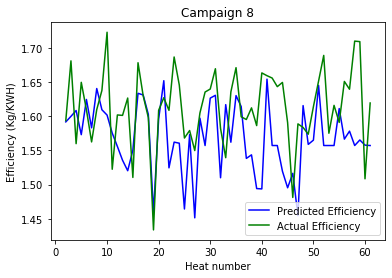

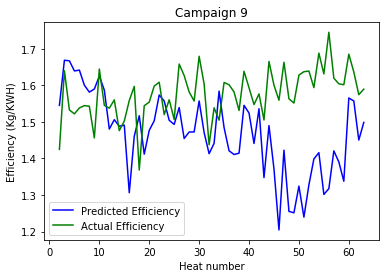

In [16]:
camp = [8,9]

for c in camp:
    dfc = df[df['campaign']==c]
    dfc = dfc.reset_index(drop=True)
    plt.plot(dfc['Heat number (life number)'],dfc['Predicted Efficiency'],c='b');
    plt.plot(dfc['Heat number (life number)'],dfc['Efficiency (MT/KWH)'],c='g');
    plt.xlabel('Heat number');
    plt.ylabel('Efficiency (Kg/KWH)');
    plt.title('Campaign {}'.format(c));
    plt.legend(['Predicted Efficiency','Actual Efficiency']);
    plt.show();

Number of correct picks on campaign 8 out of 59 is 33


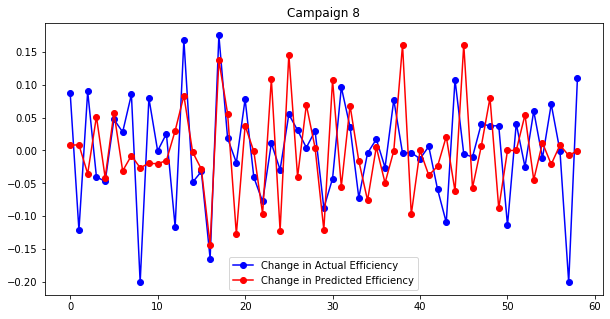

Number of correct picks on campaign 9 out of 61 is 47


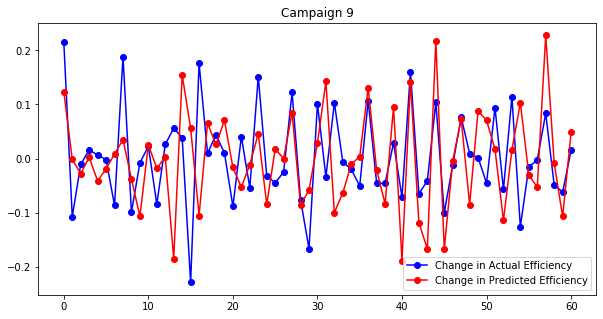

In [17]:
camp = [8,9]
a = []
b = []


for c in camp:
    correct = []
    dfc = df[df['campaign']==c]
    dfc = dfc.reset_index(drop=True)
    for i in range(dfc.shape[0]-1):
        a.append(dfc['Efficiency (MT/KWH)'][i+1]-dfc['Efficiency (MT/KWH)'][i])
        b.append(dfc['Predicted Efficiency'][i+1]-dfc['Predicted Efficiency'][i])
        fi = dfc['Efficiency (MT/KWH)'][i+1] >= dfc['Efficiency (MT/KWH)'][i]
        se = dfc['Predicted Efficiency'][i+1] >= dfc['Predicted Efficiency'][i]
        if fi == se:
            correct.append(1)
        else:
            correct.append(0)
    print("Number of correct picks on campaign {} out of {} is {}".format(c, len(correct), sum(correct)))
    plt.figure(figsize=(10,5))
    plt.plot(a, c='b',marker='o')
    plt.plot(b,c='r',marker='o')
    plt.legend(['Change in Actual Efficiency','Change in Predicted Efficiency'])
    plt.title('Campaign {}'.format(c))
    plt.show()
    a = []
    b = []

import pickle
pickle.dump(model, open('C:/Users/DSNikhil/Downloads/Project work/Data/neural_net_model_efficiency.pkl', 'wb'))
pickle.dump(scaler1, open('scaler_input_efficiency.pkl', 'wb'))
pickle.dump(scaler2, open('scaler_output_efficiency.pkl', 'wb'))

In [51]:
from scipy.optimize import minimize, LinearConstraint
dfc = df[df['campaign']==8]
dfc = dfc.reset_index(drop=True)
R = np.array(dfc['Refractory lining before heating'])
bounds = [(2,R[n-1]) for n in range(1,len(R))]
bounds = [(2,6)] + bounds

In [52]:
R

array([6.70355192, 6.65710384, 6.61065575, 6.56420767, 6.51775959,
       6.47131151, 6.42486343, 6.37841534, 6.33196726, 6.28551918,
       6.2390711 , 6.19262302, 6.14617493, 6.09972685, 6.05327877,
       6.00683069, 5.96038261, 5.91393453, 5.86748644, 5.82103836,
       5.77459028, 5.7281422 , 5.68169411, 5.63524603, 5.58879795,
       5.54234987, 5.49590179, 5.4494537 , 5.40300562, 5.35655754,
       5.31010946, 5.26366138, 5.21721329, 5.17076521, 5.12431713,
       5.07786905, 5.03142097, 4.98497289, 4.9385248 , 4.89207672,
       4.84562864, 4.79918056, 4.75273248, 4.70628439, 4.65983631,
       4.61338823, 4.56694015, 4.52049207, 4.47404398, 4.4275959 ,
       4.38114782, 4.33469974, 4.28825166, 4.24180357, 4.19535549,
       4.14890741, 4.10245933, 4.05601125, 4.00956316, 3.96311508])

In [53]:
def objective_function(R):
    dfc['Refractory lining before heating'] = R
    input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Number of capacitors removed','Tapping Temperature (C)','Refractory lining before heating',
             'Previous Voltage', 'Previous Frequency','Previous Input', 'Previous Output','Input energy previous (KWH)']
    output_columns = ['Efficiency (MT/KWH)']
    X = dfc[input_columns]
    X_test = X.iloc[:,:].values
    y = dfc[output_columns]
    y_test = y.iloc[:,:].values
    normalized_X_test = scaler1.transform(X_test)
    normalized_y_test = scaler2.transform(y_test)
    pred_test = model.predict(normalized_X_test)
    y_pred_test = scaler2.inverse_transform(pred_test)
    sum_of_squares = np.sum(np.square(y_test-y_pred_test))
    return sum_of_squares

In [56]:
objective_function(R)

0.32871217456299084

In [58]:
res = minimize(objective_function, x0 = R, bounds=bounds)
res

      fun: 0.33011425611021694
 hess_inv: <60x60 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 61
      nit: 0
   status: 0
  success: True
        x: array([6.        , 6.65710384, 6.61065575, 6.56420767, 6.51775959,
       6.47131151, 6.42486343, 6.37841534, 6.33196726, 6.28551918,
       6.2390711 , 6.19262302, 6.14617493, 6.09972685, 6.05327877,
       6.00683069, 5.96038261, 5.91393453, 5.86748644, 5.82103836,
       5.77459028, 5.7281422 , 5.68169411, 5.63524603, 5.58879795,
       5.54234987, 5.49590179, 5.4494537 , 5.40300562, 5.35655754,
       5.31010946, 5.26366138, 5.21721329, 5.17076521, 5.12431713,
       5.07786905, 5.03142097, 4

# Inverse Efficiency (KWH/Kg)

In [101]:
df = pd.read_csv('Amreli NRM data for model building2.csv')

df = df[df['Heat number (life number)']>1]    
df = df.reset_index(drop=True)
df['Number of capacitors removed'].fillna(0, inplace=True)

In [102]:
df['Efficiency (MT/KWH)'] = df['Efficiency (MT/KWH)']*1000
df['Previous Output'] = df['Previous Output']*1000
df['Previous Input'] = df['Previous Input']*1000
df['Scrap (MT)'] = df['Scrap (MT)']*1000
df['Sponge (MT)'] = df['Sponge (MT)']*1000
df['Alloys (MT)'] = df['Alloys (MT)']*1000
df['Efficiency (MT/KWH)'] = np.power(df['Efficiency (MT/KWH)'],-1)

In [103]:
input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Number of capacitors removed','Tapping Temperature (C)','Refractory lining before heating',
                 'Previous Voltage', 'Previous Frequency','Previous Input', 'Previous Output','Input energy previous (KWH)']
output_columns = ['Efficiency (MT/KWH)']

In [104]:
X = df[input_columns]
X_train = X.iloc[:318,:].values
X_test = X.iloc[318:,:].values
y = df[output_columns]
y_train = y.iloc[:318,:].values
y_test = y.iloc[318:,:].values

In [105]:
scaler1 = MinMaxScaler()
normalized_X_train = scaler1.fit_transform(X_train)
normalized_X_test = scaler1.transform(X_test)

scaler2 = MinMaxScaler()
normalized_y_train = scaler2.fit_transform(y_train)
normalized_y_test = scaler2.transform(y_test)

In [106]:
## Keras NN
## model = Sequential()
n_input = X_train.shape[1] # number of features
n_hidden_1 = 500
n_hidden_2 = 100
n_hidden_3 = 50
n_hidden_4 = 150
n_hidden_5 = 100
n_hidden_6 = 50
n_hidden_7 = 25
num_digits = 1
n_output = 1

Inp = Input(shape=(n_input,))
x = Dense(n_hidden_1, activation='relu')(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
# x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
# x = Dense(n_hidden_5, activation='relu', name = "Hidden_Layer_5")(x)
# x = Dense(n_hidden_6, activation='relu', name = "Hidden_Layer_6")(x)
# x = Dense(n_hidden_7, activation='relu', name = "Hidden_Layer_7")(x)

output = Dense(num_digits, activation='linear', name = "Output_Layer")(x)
    
model = Model(Inp, output)
model.summary() 
learning_rate = 0.001
training_epochs = 500
batch_size = 5
sgd = optimizers.SGD(lr=learning_rate)
model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer='adam',
                  metrics=['mse'])
    
history = model.fit(normalized_X_train, normalized_y_train,
                         batch_size = batch_size,
                         epochs = training_epochs,
                         verbose = 2)


pred_train = model.predict(normalized_X_train)
y_pred_train = scaler2.inverse_transform(pred_train)
pred_test = model.predict(normalized_X_test)
y_pred_test = scaler2.inverse_transform(pred_test)

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 12)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 500)               6500      
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               50100     
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 50)                5050      
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 51        
Total params: 61,701
Trainable params: 61,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
 - 1s - loss: 0.0071 - mse: 0.0071
Epoch 2/500
 - 0s - loss: 0.0036 - mse: 0.0036
Epoch 3/500
 - 0s - loss: 0

Epoch 138/500
 - 0s - loss: 7.6588e-04 - mse: 7.6588e-04
Epoch 139/500
 - 0s - loss: 8.4410e-04 - mse: 8.4410e-04
Epoch 140/500
 - 0s - loss: 7.6832e-04 - mse: 7.6832e-04
Epoch 141/500
 - 0s - loss: 7.9946e-04 - mse: 7.9946e-04
Epoch 142/500
 - 0s - loss: 8.6962e-04 - mse: 8.6962e-04
Epoch 143/500
 - 0s - loss: 7.7807e-04 - mse: 7.7807e-04
Epoch 144/500
 - 0s - loss: 7.8149e-04 - mse: 7.8149e-04
Epoch 145/500
 - 0s - loss: 9.2946e-04 - mse: 9.2946e-04
Epoch 146/500
 - 0s - loss: 8.7137e-04 - mse: 8.7137e-04
Epoch 147/500
 - 0s - loss: 9.0776e-04 - mse: 9.0776e-04
Epoch 148/500
 - 0s - loss: 7.9400e-04 - mse: 7.9400e-04
Epoch 149/500
 - 0s - loss: 7.1660e-04 - mse: 7.1660e-04
Epoch 150/500
 - 0s - loss: 7.4376e-04 - mse: 7.4376e-04
Epoch 151/500
 - 0s - loss: 7.3278e-04 - mse: 7.3278e-04
Epoch 152/500
 - 0s - loss: 7.3978e-04 - mse: 7.3978e-04
Epoch 153/500
 - 0s - loss: 7.0747e-04 - mse: 7.0747e-04
Epoch 154/500
 - 0s - loss: 7.5198e-04 - mse: 7.5198e-04
Epoch 155/500
 - 0s - loss: 8.1

Epoch 283/500
 - 0s - loss: 6.0246e-04 - mse: 6.0246e-04
Epoch 284/500
 - 0s - loss: 5.2306e-04 - mse: 5.2306e-04
Epoch 285/500
 - 0s - loss: 6.6269e-04 - mse: 6.6269e-04
Epoch 286/500
 - 0s - loss: 6.2163e-04 - mse: 6.2163e-04
Epoch 287/500
 - 0s - loss: 5.6450e-04 - mse: 5.6450e-04
Epoch 288/500
 - 0s - loss: 5.3237e-04 - mse: 5.3237e-04
Epoch 289/500
 - 0s - loss: 6.0257e-04 - mse: 6.0257e-04
Epoch 290/500
 - 0s - loss: 5.6776e-04 - mse: 5.6776e-04
Epoch 291/500
 - 0s - loss: 5.9830e-04 - mse: 5.9830e-04
Epoch 292/500
 - 0s - loss: 6.3816e-04 - mse: 6.3816e-04
Epoch 293/500
 - 0s - loss: 5.8265e-04 - mse: 5.8265e-04
Epoch 294/500
 - 0s - loss: 5.7143e-04 - mse: 5.7143e-04
Epoch 295/500
 - 0s - loss: 5.8538e-04 - mse: 5.8538e-04
Epoch 296/500
 - 0s - loss: 6.5415e-04 - mse: 6.5415e-04
Epoch 297/500
 - 0s - loss: 6.0192e-04 - mse: 6.0192e-04
Epoch 298/500
 - 0s - loss: 5.6399e-04 - mse: 5.6399e-04
Epoch 299/500
 - 0s - loss: 6.3619e-04 - mse: 6.3619e-04
Epoch 300/500
 - 0s - loss: 6.1

Epoch 427/500
 - 0s - loss: 4.7054e-04 - mse: 4.7054e-04
Epoch 428/500
 - 0s - loss: 4.5722e-04 - mse: 4.5722e-04
Epoch 429/500
 - 0s - loss: 8.4507e-04 - mse: 8.4507e-04
Epoch 430/500
 - 0s - loss: 5.2089e-04 - mse: 5.2089e-04
Epoch 431/500
 - 0s - loss: 5.7411e-04 - mse: 5.7411e-04
Epoch 432/500
 - 0s - loss: 3.7986e-04 - mse: 3.7986e-04
Epoch 433/500
 - 0s - loss: 3.7759e-04 - mse: 3.7759e-04
Epoch 434/500
 - 0s - loss: 5.3421e-04 - mse: 5.3421e-04
Epoch 435/500
 - 0s - loss: 8.4460e-04 - mse: 8.4460e-04
Epoch 436/500
 - 0s - loss: 5.5879e-04 - mse: 5.5879e-04
Epoch 437/500
 - 0s - loss: 5.1209e-04 - mse: 5.1209e-04
Epoch 438/500
 - 0s - loss: 4.8632e-04 - mse: 4.8632e-04
Epoch 439/500
 - 0s - loss: 6.6094e-04 - mse: 6.6094e-04
Epoch 440/500
 - 0s - loss: 3.9631e-04 - mse: 3.9631e-04
Epoch 441/500
 - 0s - loss: 3.7458e-04 - mse: 3.7458e-04
Epoch 442/500
 - 0s - loss: 3.0835e-04 - mse: 3.0835e-04
Epoch 443/500
 - 0s - loss: 3.2341e-04 - mse: 3.2341e-04
Epoch 444/500
 - 0s - loss: 3.4

In [107]:
for i in range(num_digits):
    print(output_columns[i])
    print("Train score is {}".format(mean_squared_error(y_train[:,i], y_pred_train[:,i])))
    print("Test score is {}".format(mean_squared_error(y_test[:,i], y_pred_test[:,i])))
    print("R2 score is {}".format(r2_score(y_test[:,i], y_pred_test[:,i])))
    print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train[:,i]-y_train[:,i]))/np.sum(np.square(y_train[:,i]-np.mean(y_train[:,i])))*100))
    print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test[:,i]-y_test[:,i]))/np.sum(np.square(y_test[:,i]-np.mean(y_test[:,i])))*100))

Efficiency (MT/KWH)
Train score is 0.0007484181929178394
Test score is 0.0010438794621643792
R2 score is -0.5412531952518882
Train NMSE score is 18.30110038217263
Test NMSE score is 154.12531952518881


In [108]:
y_pred_train = y_pred_train.reshape(318,)
y_pred_test = y_pred_test.reshape(122,)
y = np.concatenate((y_pred_train, y_pred_test),axis=0)
df['Predicted Efficiency'] = y

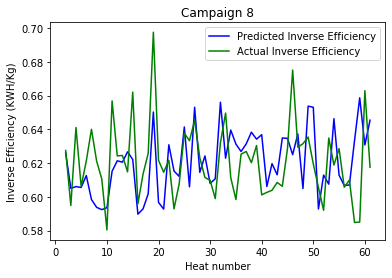

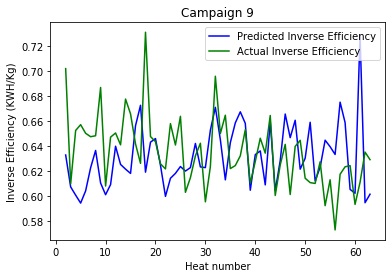

In [109]:
camp = [8,9]

for c in camp:
    dfc = df[df['campaign']==c]
    dfc = dfc.reset_index(drop=True)
    plt.plot(dfc['Heat number (life number)'],dfc['Predicted Efficiency'],c='b');
    plt.plot(dfc['Heat number (life number)'],dfc['Efficiency (MT/KWH)'],c='g');
    plt.xlabel('Heat number');
    plt.ylabel('Inverse Efficiency (KWH/Kg)');
    plt.title('Campaign {}'.format(c));
    plt.legend(['Predicted Inverse Efficiency','Actual Inverse Efficiency']);
    plt.show();

# Logarithmic Scale with normalization

In [74]:
df = pd.read_csv('Amreli NRM data for model building2.csv')

df = df[df['Heat number (life number)']>1]    
df = df.reset_index(drop=True)
df['Number of capacitors removed'].fillna(0, inplace=True)

In [75]:
df['Previous Output'] = np.log(df['Previous Output'])
df['Input energy previous (KWH)'] = np.log(df['Input energy previous (KWH)'])
df['Efficiency (MT/KWH)'] = np.log(df['Efficiency (MT/KWH)'])

In [76]:
input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Number of capacitors removed','Tapping Temperature (C)','Refractory lining before heating',
                 'Previous Voltage', 'Previous Frequency','Previous Input', 'Previous Output','Input energy previous (KWH)']
output_columns = ['Efficiency (MT/KWH)']

In [77]:
X = df[input_columns]
X_train = X.iloc[:318,:].values
X_test = X.iloc[318:,:].values
y = df[output_columns]
y_train = y.iloc[:318,:].values
y_test = y.iloc[318:,:].values

In [78]:
scaler1 = MinMaxScaler()
normalized_X_train = scaler1.fit_transform(X_train)
normalized_X_test = scaler1.transform(X_test)

scaler2 = MinMaxScaler()
normalized_y_train = scaler2.fit_transform(y_train)
normalized_y_test = scaler2.transform(y_test)

In [79]:
## Keras NN
## model = Sequential()
n_input = X_train.shape[1] # number of features
n_hidden_1 = 500
n_hidden_2 = 100
n_hidden_3 = 50
n_hidden_4 = 150
n_hidden_5 = 100
n_hidden_6 = 50
n_hidden_7 = 25
num_digits = 1
n_output = 1

Inp = Input(shape=(n_input,))
x = Dense(n_hidden_1, activation='relu')(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
# x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
# x = Dense(n_hidden_5, activation='relu', name = "Hidden_Layer_5")(x)
# x = Dense(n_hidden_6, activation='relu', name = "Hidden_Layer_6")(x)
# x = Dense(n_hidden_7, activation='relu', name = "Hidden_Layer_7")(x)

output = Dense(num_digits, activation='linear', name = "Output_Layer")(x)
    
model = Model(Inp, output)
model.summary() 
learning_rate = 0.001
training_epochs = 500
batch_size = 5
sgd = optimizers.SGD(lr=learning_rate)
model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer='adam',
                  metrics=['mse'])
    
history = model.fit(normalized_X_train, normalized_y_train,
                         batch_size = batch_size,
                         epochs = training_epochs,
                         verbose = 2)


pred_train = model.predict(normalized_X_train)
y_pred_train = scaler2.inverse_transform(pred_train)
pred_test = model.predict(normalized_X_test)
y_pred_test = scaler2.inverse_transform(pred_test)

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 12)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 500)               6500      
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               50100     
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 50)                5050      
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 51        
Total params: 61,701
Trainable params: 61,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
 - 1s - loss: 0.0170 - mse: 0.0170
Epoch 2/500
 - 0s - loss: 0.0039 - mse: 0.0039
Epoch 3/500
 - 0s - loss: 0

Epoch 150/500
 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 151/500
 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 152/500
 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 153/500
 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 154/500
 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 155/500
 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 156/500
 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 157/500
 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 158/500
 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 159/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 160/500
 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 161/500
 - 0s - loss: 0.0015 - mse: 0.0015
Epoch 162/500
 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 163/500
 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 164/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 165/500
 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 166/500
 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 167/500
 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 168/500
 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 169/500
 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 170/500
 - 0s 

 - 0s - loss: 0.0012 - mse: 0.0012
Epoch 318/500
 - 0s - loss: 0.0010 - mse: 0.0010
Epoch 319/500
 - 0s - loss: 0.0012 - mse: 0.0012
Epoch 320/500
 - 0s - loss: 0.0012 - mse: 0.0012
Epoch 321/500
 - 1s - loss: 0.0012 - mse: 0.0012
Epoch 322/500
 - 1s - loss: 0.0013 - mse: 0.0013
Epoch 323/500
 - 0s - loss: 0.0012 - mse: 0.0012
Epoch 324/500
 - 0s - loss: 0.0012 - mse: 0.0012
Epoch 325/500
 - 0s - loss: 0.0013 - mse: 0.0013
Epoch 326/500
 - 0s - loss: 0.0012 - mse: 0.0012
Epoch 327/500
 - 1s - loss: 0.0011 - mse: 0.0011
Epoch 328/500
 - 0s - loss: 0.0012 - mse: 0.0012
Epoch 329/500
 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 330/500
 - 0s - loss: 9.3251e-04 - mse: 9.3251e-04
Epoch 331/500
 - 0s - loss: 0.0013 - mse: 0.0013
Epoch 332/500
 - 0s - loss: 0.0012 - mse: 0.0012
Epoch 333/500
 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 334/500
 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 335/500
 - 0s - loss: 0.0012 - mse: 0.0012
Epoch 336/500
 - 0s - loss: 0.0012 - mse: 0.0012
Epoch 337/500
 - 0s - loss

 - 0s - loss: 8.2129e-04 - mse: 8.2129e-04
Epoch 476/500
 - 0s - loss: 9.9496e-04 - mse: 9.9496e-04
Epoch 477/500
 - 0s - loss: 0.0012 - mse: 0.0012
Epoch 478/500
 - 0s - loss: 0.0012 - mse: 0.0012
Epoch 479/500
 - 0s - loss: 0.0010 - mse: 0.0010
Epoch 480/500
 - 0s - loss: 0.0010 - mse: 0.0010
Epoch 481/500
 - 0s - loss: 8.3883e-04 - mse: 8.3883e-04
Epoch 482/500
 - 0s - loss: 6.0220e-04 - mse: 6.0219e-04
Epoch 483/500
 - 0s - loss: 7.7407e-04 - mse: 7.7407e-04
Epoch 484/500
 - 0s - loss: 8.4237e-04 - mse: 8.4237e-04
Epoch 485/500
 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 486/500
 - 0s - loss: 8.8071e-04 - mse: 8.8071e-04
Epoch 487/500
 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 488/500
 - 0s - loss: 9.4909e-04 - mse: 9.4909e-04
Epoch 489/500
 - 0s - loss: 6.4467e-04 - mse: 6.4467e-04
Epoch 490/500
 - 0s - loss: 5.9645e-04 - mse: 5.9645e-04
Epoch 491/500
 - 0s - loss: 0.0010 - mse: 0.0010
Epoch 492/500
 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 493/500
 - 0s - loss: 0.0012 - mse: 0.0012
Epo

In [80]:
for i in range(num_digits):
    print(output_columns[i])
    print("Train score is {}".format(mean_squared_error(y_train[:,i], y_pred_train[:,i])))
    print("Test score is {}".format(mean_squared_error(y_test[:,i], y_pred_test[:,i])))
    print("R2 score is {}".format(r2_score(y_test[:,i], y_pred_test[:,i])))
    print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train[:,i]-y_train[:,i]))/np.sum(np.square(y_train[:,i]-np.mean(y_train[:,i])))*100))
    print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test[:,i]-y_test[:,i]))/np.sum(np.square(y_test[:,i]-np.mean(y_test[:,i])))*100))

Efficiency (MT/KWH)
Train score is 0.0013238672744961843
Test score is 0.002164043230503851
R2 score is -0.3024121764164962
Train NMSE score is 15.244962118811015
Test NMSE score is 130.24121764164963


y_pred_train = np.exp(y_pred_train)
y_pred_test = np.exp(y_pred_test)

y_train = np.exp(y_train)
y_test = np.exp(y_test)

In [81]:
y_pred_train = y_pred_train.reshape(318,)
y_pred_test = y_pred_test.reshape(122,)
y = np.concatenate((y_pred_train, y_pred_test),axis=0)
df['Predicted Efficiency'] = y
df['Efficiency (MT/KWH)'] = np.exp(df['Efficiency (MT/KWH)'])
df['Predicted Efficiency'] = np.exp(df['Predicted Efficiency'])

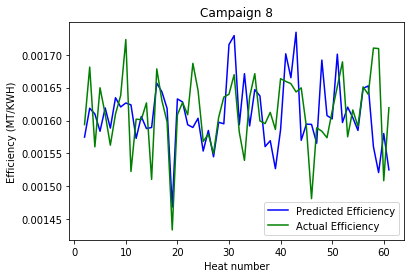

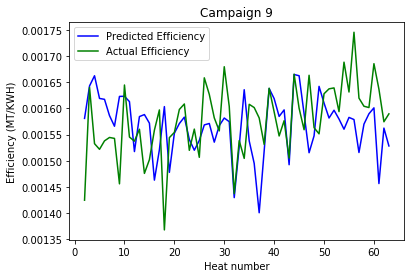

In [82]:
camp = [8,9]

for c in camp:
    dfc = df[df['campaign']==c]
    dfc = dfc.reset_index(drop=True)
    plt.plot(dfc['Heat number (life number)'],dfc['Predicted Efficiency'],c='b');
    plt.plot(dfc['Heat number (life number)'],dfc['Efficiency (MT/KWH)'],c='g');
    plt.xlabel('Heat number');
    plt.ylabel('Efficiency (MT/KWH)');
    plt.title('Campaign {}'.format(c));
    plt.legend(['Predicted Efficiency','Actual Efficiency']);
    plt.show();

In [83]:
df.columns

Index(['campaign', 'Heat number (life number)',
       'Total Heat Time previous (minutes)', 'Total Heat Time (minutes)',
       'Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)',
       'Input (MT)', 'Final C%', 'Tapping Temperature (C)', 'Output (MT)',
       'Input energy previous (KWH)', 'Input energy (KWH)', 'Previous Voltage',
       'Previous Frequency', 'Previous Rating of the Furnace', 'Voltage',
       'Frequency', 'Rating of the furnace (KW)', 'Melt rate (MT/Hr)',
       'Efficiency (MT/KWH)', 'Number of capacitors removed',
       'Refractory lining before heating', 'Refractory lining after heating',
       'Previous Input', 'Previous Output', 'Predicted Efficiency'],
      dtype='object')

# Training with additional features

In [61]:
df = pd.read_csv('Amreli NRM data for model building2.csv')

df = df[df['Heat number (life number)']>1]    
df = df.reset_index(drop=True)
df['Number of capacitors removed'].fillna(0, inplace=True)

input_columns = ['Previous Input','Previous Output','Input (MT)','Input energy previous (KWH)']
output_columns = ['Efficiency (MT/KWH)']

In [62]:
X = df[input_columns]
X_train = X.iloc[:318,:].values
X_test = X.iloc[318:,:].values
y = df[output_columns]
y_train = y.iloc[:318,:].values
y_test = y.iloc[318:,:].values

scaler1 = MinMaxScaler()
normalized_X_train = scaler1.fit_transform(X_train)
normalized_X_test = scaler1.transform(X_test)

scaler2 = MinMaxScaler()
normalized_y_train = scaler2.fit_transform(y_train)
normalized_y_test = scaler2.transform(y_test)

In [63]:
## Keras NN
## model = Sequential()
n_input = X_train.shape[1] # number of features
n_hidden_1 = 500
n_hidden_2 = 100
n_hidden_3 = 50
n_hidden_4 = 150
n_hidden_5 = 100
n_hidden_6 = 50
n_hidden_7 = 25
num_digits = 1
n_output = 1

Inp = Input(shape=(n_input,))
x = Dense(n_hidden_1, activation='relu')(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
# x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
# x = Dense(n_hidden_5, activation='relu', name = "Hidden_Layer_5")(x)
# x = Dense(n_hidden_6, activation='relu', name = "Hidden_Layer_6")(x)
# x = Dense(n_hidden_7, activation='relu', name = "Hidden_Layer_7")(x)

output = Dense(num_digits, activation='linear', name = "Output_Layer")(x)
    
model = Model(Inp, output)
model.summary() 
learning_rate = 0.001
training_epochs = 500
batch_size = 5
sgd = optimizers.SGD(lr=learning_rate)
model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer='adam',
                  metrics=['mse'])
    
history = model.fit(normalized_X_train, normalized_y_train,
                         batch_size = batch_size,
                         epochs = training_epochs,
                         verbose = 2)


pred_train = model.predict(normalized_X_train)
y_pred_train = scaler2.inverse_transform(pred_train)
pred_test = model.predict(normalized_X_test)
y_pred_test = scaler2.inverse_transform(pred_test)

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 500)               2500      
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               50100     
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 50)                5050      
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 51        
Total params: 57,701
Trainable params: 57,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
 - 1s - loss: 0.0100 - mse: 0.0100
Epoch 2/500
 - 0s - loss: 0.0040 - mse: 0.0040
Epoch 3/500
 - 0s - loss: 0

Epoch 150/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 151/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 152/500
 - 0s - loss: 0.0029 - mse: 0.0029
Epoch 153/500
 - 0s - loss: 0.0029 - mse: 0.0029
Epoch 154/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 155/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 156/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 157/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 158/500
 - 0s - loss: 0.0029 - mse: 0.0029
Epoch 159/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 160/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 161/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 162/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 163/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 164/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 165/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 166/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 167/500
 - 0s - loss: 0.0029 - mse: 0.0029
Epoch 168/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 169/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 170/500
 - 0s 

 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 318/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 319/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 320/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 321/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 322/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 323/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 324/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 325/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 326/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 327/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 328/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 329/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 330/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 331/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 332/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 333/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 334/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 335/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 336/500
 - 0s - loss: 0.0029 - mse: 0.0029
Epoch 337/500
 - 0s - loss: 0.0027

Epoch 485/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 486/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 487/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 488/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 489/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 490/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 491/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 492/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 493/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 494/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 495/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 496/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 497/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 498/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 499/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 500/500
 - 0s - loss: 0.0028 - mse: 0.0028


In [64]:
for i in range(num_digits):
    print(output_columns[i])
    print("Train score is {}".format(mean_squared_error(y_train[:,i], y_pred_train[:,i])))
    print("Test score is {}".format(mean_squared_error(y_test[:,i], y_pred_test[:,i])))
    print("R2 score is {}".format(r2_score(y_test[:,i], y_pred_test[:,i])))
    print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train[:,i]-y_train[:,i]))/np.sum(np.square(y_train[:,i]-np.mean(y_train[:,i])))*100))
    print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test[:,i]-y_test[:,i]))/np.sum(np.square(y_test[:,i]-np.mean(y_test[:,i])))*100))

y_pred_train = y_pred_train.reshape(318,)
y_pred_test = y_pred_test.reshape(122,)
y = np.concatenate((y_pred_train, y_pred_test),axis=0)
df['Predicted Efficiency'] = y

Efficiency (MT/KWH)
Train score is 2.018468499546063e-08
Test score is 4.162998906954934e-09
R2 score is -0.014807397652709886
Train NMSE score is 70.9998666997926
Test NMSE score is 101.48073976527098


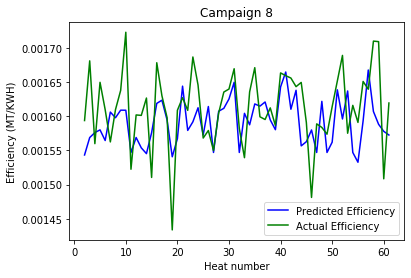

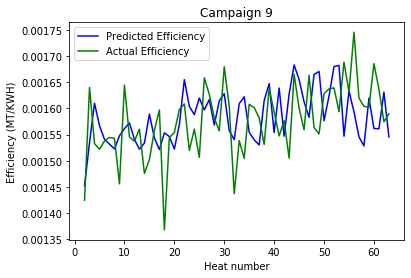

In [65]:
camp = [8,9]

for c in camp:
    dfc = df[df['campaign']==c]
    dfc = dfc.reset_index(drop=True)
    plt.plot(dfc['Heat number (life number)'],dfc['Predicted Efficiency'],c='b');
    plt.plot(dfc['Heat number (life number)'],dfc['Efficiency (MT/KWH)'],c='g');
    plt.xlabel('Heat number');
    plt.ylabel('Efficiency (MT/KWH)');
    plt.title('Campaign {}'.format(c));
    plt.legend(['Predicted Efficiency','Actual Efficiency']);
    plt.show();

# Some Experimentation

In [4]:
df.columns

NameError: name 'df' is not defined

In [24]:
df = pd.read_csv('Amreli NRM data for model building3.csv')

df = df[df['Heat number (life number)']>1]    
df = df.reset_index(drop=True)
df['Number of capacitors removed'].fillna(0, inplace=True)

input_columns = ['Previous Efficiency','Previous Input','Refractory lining before heating','Previous Voltage',
                'Previous Frequency', 'Number of capacitors removed','Input (MT)']
output_columns = ['Efficiency (MT/KWH)']

In [25]:
df['Efficiency (MT/KWH)'] = df['Efficiency (MT/KWH)']*1000
df['Previous Output'] = df['Previous Output']*1000
df['Previous Input'] = df['Previous Input']*1000
df['Previous Efficiency'] = df['Previous Efficiency']*1000
df['Input (MT)'] = df['Input (MT)']*1000

In [26]:
X = df[input_columns]
X_train = X.iloc[:318,:].values
X_test = X.iloc[318:,:].values
y = df[output_columns]
y_train = y.iloc[:318,:].values
y_test = y.iloc[318:,:].values

scaler1 = MinMaxScaler()
normalized_X_train = scaler1.fit_transform(X_train)
normalized_X_test = scaler1.transform(X_test)

scaler2 = MinMaxScaler()
normalized_y_train = scaler2.fit_transform(y_train)
normalized_y_test = scaler2.transform(y_test)

In [27]:
## Keras NN
## model = Sequential()
n_input = X_train.shape[1] # number of features
n_hidden_1 = 500
n_hidden_2 = 100
n_hidden_3 = 50
n_hidden_4 = 150
n_hidden_5 = 100
n_hidden_6 = 50
n_hidden_7 = 25
num_digits = 1
n_output = 1

Inp = Input(shape=(n_input,))
x = Dense(n_hidden_1, activation='relu')(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
# x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
# x = Dense(n_hidden_5, activation='relu', name = "Hidden_Layer_5")(x)
# x = Dense(n_hidden_6, activation='relu', name = "Hidden_Layer_6")(x)
# x = Dense(n_hidden_7, activation='relu', name = "Hidden_Layer_7")(x)

output = Dense(num_digits, activation='linear', name = "Output_Layer")(x)
    
model = Model(Inp, output)
model.summary() 
learning_rate = 0.001
training_epochs = 500
batch_size = 5
sgd = optimizers.SGD(lr=learning_rate)
model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer='adam',
                  metrics=['mse'])
    
history = model.fit(normalized_X_train, normalized_y_train,
                         batch_size = batch_size,
                         epochs = training_epochs,
                         verbose = 2)


pred_train = model.predict(normalized_X_train)
y_pred_train = scaler2.inverse_transform(pred_train)
pred_test = model.predict(normalized_X_test)
y_pred_test = scaler2.inverse_transform(pred_test)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 7)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               4000      
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               50100     
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 50)                5050      
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 51        
Total params: 59,201
Trainable params: 59,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
 - 1s - loss: 0.0060 - mse: 0.0060
Epoch 2/500
 - 0s - loss: 0.0043 - mse: 0.0043
Epoch 3/500
 - 0s - loss: 0

Epoch 150/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 151/500
 - 0s - loss: 0.0029 - mse: 0.0029
Epoch 152/500
 - 0s - loss: 0.0026 - mse: 0.0026
Epoch 153/500
 - 0s - loss: 0.0030 - mse: 0.0030
Epoch 154/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 155/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 156/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 157/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 158/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 159/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 160/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 161/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 162/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 163/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 164/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 165/500
 - 0s - loss: 0.0026 - mse: 0.0026
Epoch 166/500
 - 0s - loss: 0.0026 - mse: 0.0026
Epoch 167/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 168/500
 - 0s - loss: 0.0028 - mse: 0.0028
Epoch 169/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 170/500
 - 0s 

 - 0s - loss: 0.0025 - mse: 0.0025
Epoch 318/500
 - 0s - loss: 0.0024 - mse: 0.0024
Epoch 319/500
 - 0s - loss: 0.0026 - mse: 0.0026
Epoch 320/500
 - 0s - loss: 0.0026 - mse: 0.0026
Epoch 321/500
 - 0s - loss: 0.0024 - mse: 0.0024
Epoch 322/500
 - 0s - loss: 0.0023 - mse: 0.0023
Epoch 323/500
 - 0s - loss: 0.0024 - mse: 0.0024
Epoch 324/500
 - 0s - loss: 0.0024 - mse: 0.0024
Epoch 325/500
 - 0s - loss: 0.0023 - mse: 0.0023
Epoch 326/500
 - 0s - loss: 0.0023 - mse: 0.0023
Epoch 327/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 328/500
 - 0s - loss: 0.0026 - mse: 0.0026
Epoch 329/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 330/500
 - 0s - loss: 0.0025 - mse: 0.0025
Epoch 331/500
 - 0s - loss: 0.0026 - mse: 0.0026
Epoch 332/500
 - 0s - loss: 0.0026 - mse: 0.0026
Epoch 333/500
 - 0s - loss: 0.0025 - mse: 0.0025
Epoch 334/500
 - 0s - loss: 0.0026 - mse: 0.0026
Epoch 335/500
 - 0s - loss: 0.0025 - mse: 0.0025
Epoch 336/500
 - 0s - loss: 0.0026 - mse: 0.0026
Epoch 337/500
 - 0s - loss: 0.0025

Epoch 485/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 486/500
 - 0s - loss: 0.0015 - mse: 0.0015
Epoch 487/500
 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 488/500
 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 489/500
 - 0s - loss: 0.0023 - mse: 0.0023
Epoch 490/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 491/500
 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 492/500
 - 0s - loss: 0.0023 - mse: 0.0023
Epoch 493/500
 - 0s - loss: 0.0027 - mse: 0.0027
Epoch 494/500
 - 0s - loss: 0.0025 - mse: 0.0025
Epoch 495/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 496/500
 - 0s - loss: 0.0025 - mse: 0.0025
Epoch 497/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 498/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 499/500
 - 0s - loss: 0.0015 - mse: 0.0015
Epoch 500/500
 - 0s - loss: 0.0025 - mse: 0.0025


In [28]:
for i in range(num_digits):
    print(output_columns[i])
    print("Train score is {}".format(mean_squared_error(y_train[:,i], y_pred_train[:,i])))
    print("Test score is {}".format(mean_squared_error(y_test[:,i], y_pred_test[:,i])))
    print("R2 score is {}".format(r2_score(y_test[:,i], y_pred_test[:,i])))
    print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train[:,i]-y_train[:,i]))/np.sum(np.square(y_train[:,i]-np.mean(y_train[:,i])))*100))
    print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test[:,i]-y_test[:,i]))/np.sum(np.square(y_test[:,i]-np.mean(y_test[:,i])))*100))
y_pred_train = y_pred_train.reshape(318,)
y_pred_test = y_pred_test.reshape(122,)
y = np.concatenate((y_pred_train, y_pred_test),axis=0)
df['Predicted Efficiency'] = y

Efficiency (MT/KWH)
Train score is 0.015527582785053064
Test score is 0.004348314717022734
R2 score is -0.059981527928032685
Train NMSE score is 54.61845494030227
Test NMSE score is 105.99815279280327


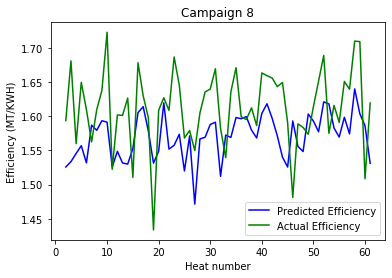

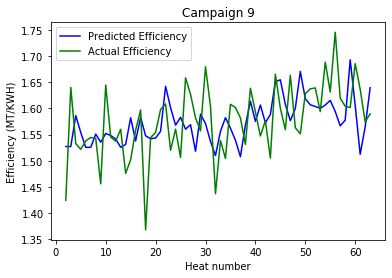

In [29]:
camp = [8,9]

for c in camp:
    dfc = df[df['campaign']==c]
    dfc = dfc.reset_index(drop=True)
    plt.plot(dfc['Heat number (life number)'],dfc['Predicted Efficiency'],c='b');
    plt.plot(dfc['Heat number (life number)'],dfc['Efficiency (MT/KWH)'],c='g');
    plt.xlabel('Heat number');
    plt.ylabel('Efficiency (MT/KWH)');
    plt.title('Campaign {}'.format(c));
    plt.legend(['Predicted Efficiency','Actual Efficiency']);
    plt.show();

Number of correct picks on campaign 8 out of 59 is 35


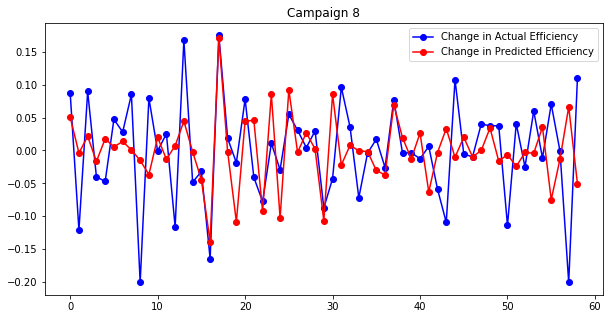

Number of correct picks on campaign 9 out of 61 is 35


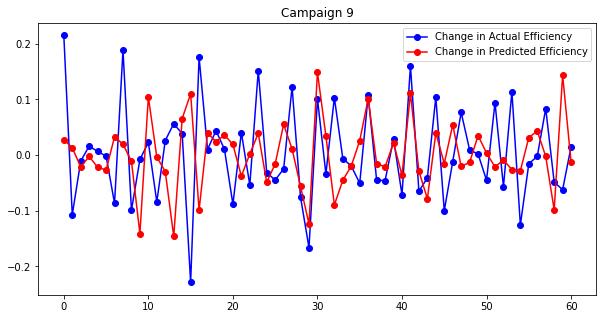

In [44]:
camp = [8,9]
a = []
b = []


for c in camp:
    correct = []
    dfc = df[df['campaign']==c]
    dfc = dfc.reset_index(drop=True)
    for i in range(dfc.shape[0]-1):
        a.append(dfc['Efficiency (MT/KWH)'][i+1]-dfc['Efficiency (MT/KWH)'][i])
        b.append(dfc['Predicted Efficiency'][i+1]-dfc['Predicted Efficiency'][i])
        fi = dfc['Efficiency (MT/KWH)'][i+1] >= dfc['Efficiency (MT/KWH)'][i]
        se = dfc['Predicted Efficiency'][i+1] >= dfc['Predicted Efficiency'][i]
        if fi == se:
            correct.append(1)
        else:
            correct.append(0)
    print("Number of correct picks on campaign {} out of {} is {}".format(c, len(correct), sum(correct)))
    plt.figure(figsize=(10,5))
    plt.plot(a, c='b',marker='o')
    plt.plot(b,c='r',marker='o')
    plt.legend(['Change in Actual Efficiency','Change in Predicted Efficiency'])
    plt.title('Campaign {}'.format(c))
    plt.show()
    a = []
    b = []

Inferences:

R2 score is varying a lot every time I train the neural network

Ask Bala about NMSE definition